# **Klasifikasi Dan BaggingClassifier(Ecoli)**

# **1. Klasifikasi Menggunakan Naive Bayes**

## 1.1. Modeling Klasifikasi menggunakan Naive bayes pada data ecoli sebelum di oversampling

Nama kolom dataset: ['id', 'sequence', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class']

Accuracy Score : 0.7941

Classification Report:
               precision    recall  f1-score   support

          cp       0.97      1.00      0.98        29
          im       1.00      0.44      0.61        16
         imU       0.50      0.86      0.63         7
          om       0.00      0.00      0.00         4
         omL       1.00      1.00      1.00         1
          pp       0.61      1.00      0.76        11

    accuracy                           0.79        68
   macro avg       0.68      0.72      0.66        68
weighted avg       0.81      0.79      0.76        68



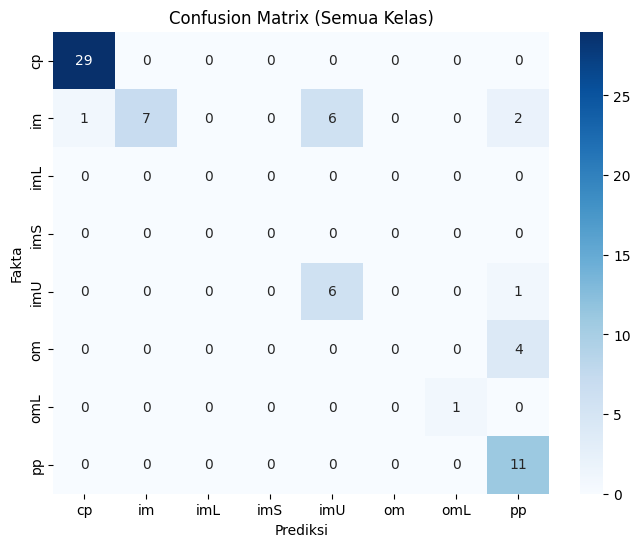

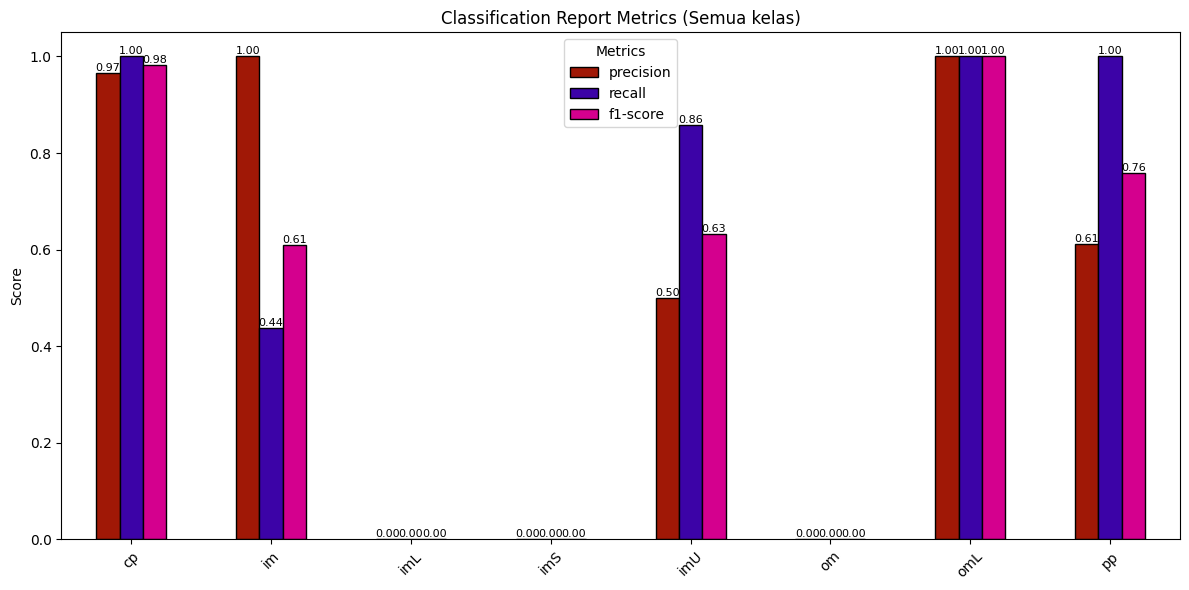

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === LOAD DATASET dari CSV ===
df = pd.read_csv("data_ecoli_original.csv")
# df = pd.read_csv("data_ecoli_adasyn.csv")
# df = pd.read_csv("data_ecoli_smote.csv")

print("Nama kolom dataset:", df.columns.tolist())

# Pisahkan fitur dan label
# Drop kolom non-numerik (id, sequence) dan target (class)
X = df.drop(columns=["id", "sequence", "class"])
y = df["class"]

# === SPLIT DATA ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === TRAINING Naive Bayes ===
nb = GaussianNB()
nb.fit(X_train, y_train)
prediksi = nb.predict(X_test)

# === EVALUASI ===
print(f"\nAccuracy Score : {accuracy_score(y_test, prediksi):.4f}")
print("\nClassification Report:\n", classification_report(y_test, prediksi, zero_division=0))

# === CONFUSION MATRIX ===
labels = np.unique(np.concatenate([y_train, y_test]))
cm = confusion_matrix(y_test, prediksi, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

# === VISUALISASI METRIK ===
report = classification_report(
    y_test, prediksi, labels=labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()
metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


## 1.2. Modeling Klasifikasi menggunakan Naive bayes pada data Ecoli setelah di Oversampling menggunakan ADASYN

accuracy_score : 0.8362068965517241
akurasi lengkap:
               precision    recall  f1-score   support

          cp       1.00      0.97      0.98        30
          im       0.86      0.43      0.57        28
         imL       1.00      0.59      0.75        32
         imS       0.97      1.00      0.99        33
         imU       0.71      0.83      0.77        30
          om       0.97      0.93      0.95        30
         omL       0.61      1.00      0.76        22
          pp       0.72      0.96      0.83        27

    accuracy                           0.84       232
   macro avg       0.86      0.84      0.82       232
weighted avg       0.87      0.84      0.83       232



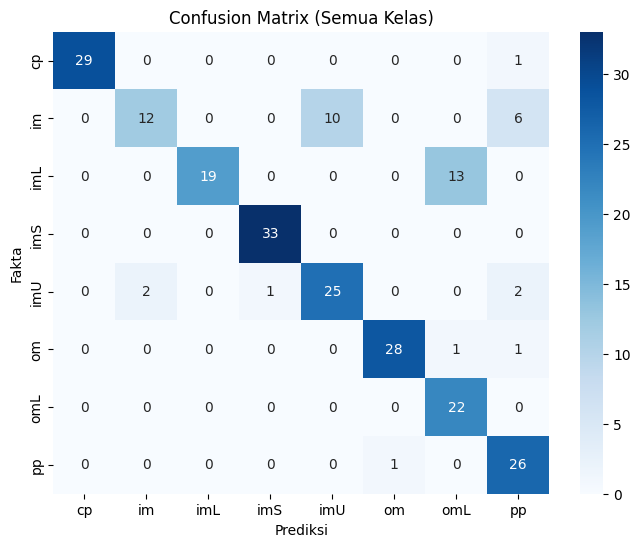

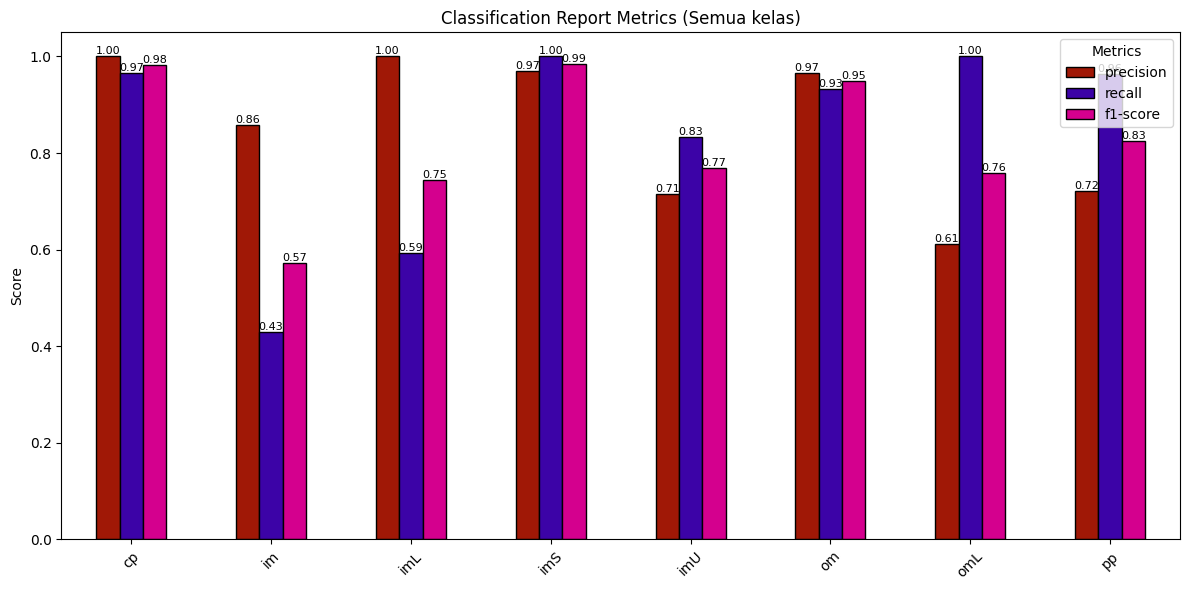

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Load dataset oversampling ADASYN ===
data_adasyn = pd.read_csv("data_ecoli_adasyn.csv")

# Buang hanya kolom target (class)
x_adasyn = data_adasyn.drop(columns=["class"])
y_adasyn = data_adasyn["class"]

# Split data
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(
    x_adasyn, y_adasyn, test_size=0.2, random_state=42
)

# === Training Naive Bayes ===
nb = GaussianNB()
nb.fit(X_train_adasyn, y_train_adasyn)

# Prediksi
prediksi_adasyn = nb.predict(X_test_adasyn)

# Akurasi
print(f"accuracy_score : {accuracy_score(y_test_adasyn, prediksi_adasyn)}")
print("akurasi lengkap:\n", classification_report(y_test_adasyn, prediksi_adasyn, zero_division=0))

# === Confusion Matrix ===
labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))
cm = confusion_matrix(y_test_adasyn, prediksi_adasyn, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

# === Classification Report (Bar Chart) ===
report = classification_report(
    y_test_adasyn, prediksi_adasyn, labels=labels,
    output_dict=True, zero_division=0
)
df_report = pd.DataFrame(report).transpose()
metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

# Plot bar chart
ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# Label angka di atas bar
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


## 1.3. Modeling Klasifikasi menggunakan Naive bayes pada data ecoli setelah di oversampling menggunakan SMOTE

Nama kolom dataset SMOTE: ['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class']

Accuracy Score (SMOTE): 0.8035

Classification Report (SMOTE):
               precision    recall  f1-score   support

          cp       0.80      1.00      0.89        28
          im       1.00      0.50      0.67        28
         imL       1.00      0.72      0.84        29
         imS       1.00      1.00      1.00        29
         imU       0.81      0.86      0.83        29
          om       1.00      0.39      0.56        28
         omL       0.78      1.00      0.88        29
          pp       0.53      0.93      0.68        29

    accuracy                           0.80       229
   macro avg       0.86      0.80      0.79       229
weighted avg       0.86      0.80      0.79       229



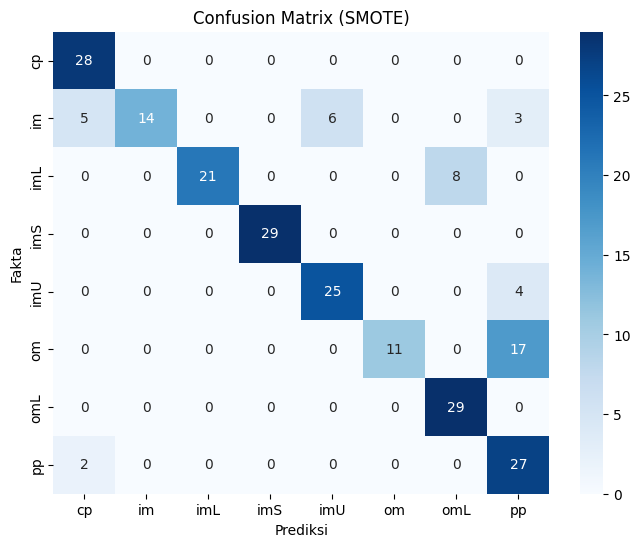

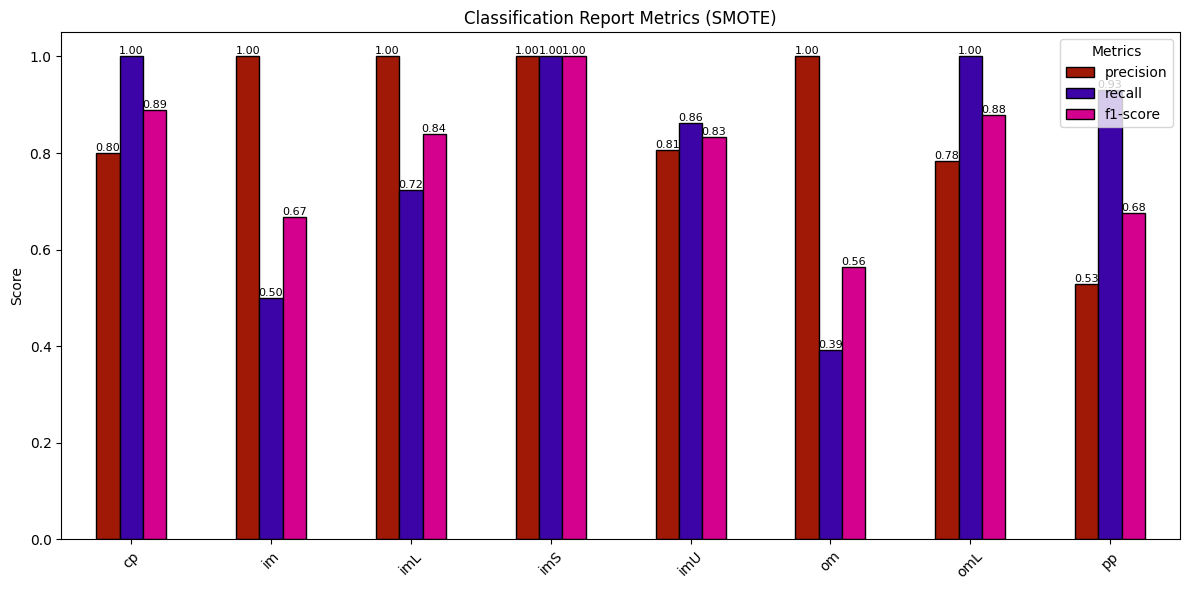

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === LOAD DATASET SMOTE ===
data_smote = pd.read_csv("data_ecoli_smote.csv")

print("Nama kolom dataset SMOTE:", data_smote.columns.tolist())

# Pisahkan fitur dan label
# Jika masih ada 'id' dan 'sequence', kita drop
x_smote = data_smote.drop(columns=[col for col in ["id", "sequence", "class"] if col in data_smote.columns])
y_smote = data_smote["class"]

# === SPLIT DATA ===
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    x_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)

# === TRAINING Naive Bayes ===
nb = GaussianNB()
nb.fit(X_train_smote, y_train_smote)
prediksi_smote = nb.predict(X_test_smote)

# === EVALUASI ===
print(f"\nAccuracy Score (SMOTE): {accuracy_score(y_test_smote, prediksi_smote):.4f}")
print("\nClassification Report (SMOTE):\n", classification_report(y_test_smote, prediksi_smote, zero_division=0))

# === CONFUSION MATRIX ===
labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))
cm = confusion_matrix(y_test_smote, prediksi_smote, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (SMOTE)")
plt.show()

# === VISUALISASI METRIK ===
report = classification_report(
    y_test_smote, prediksi_smote, labels=labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()
metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (SMOTE)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


## 1.4. Perbandingan akurasi antara data sebelum di oversampling dan sesudah

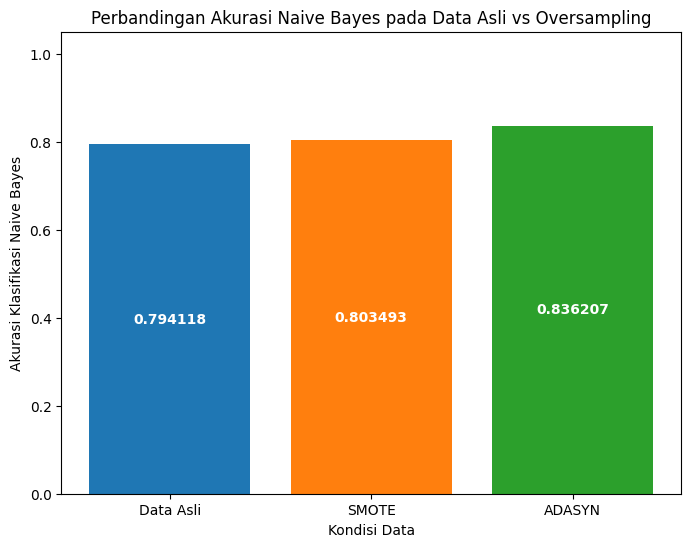

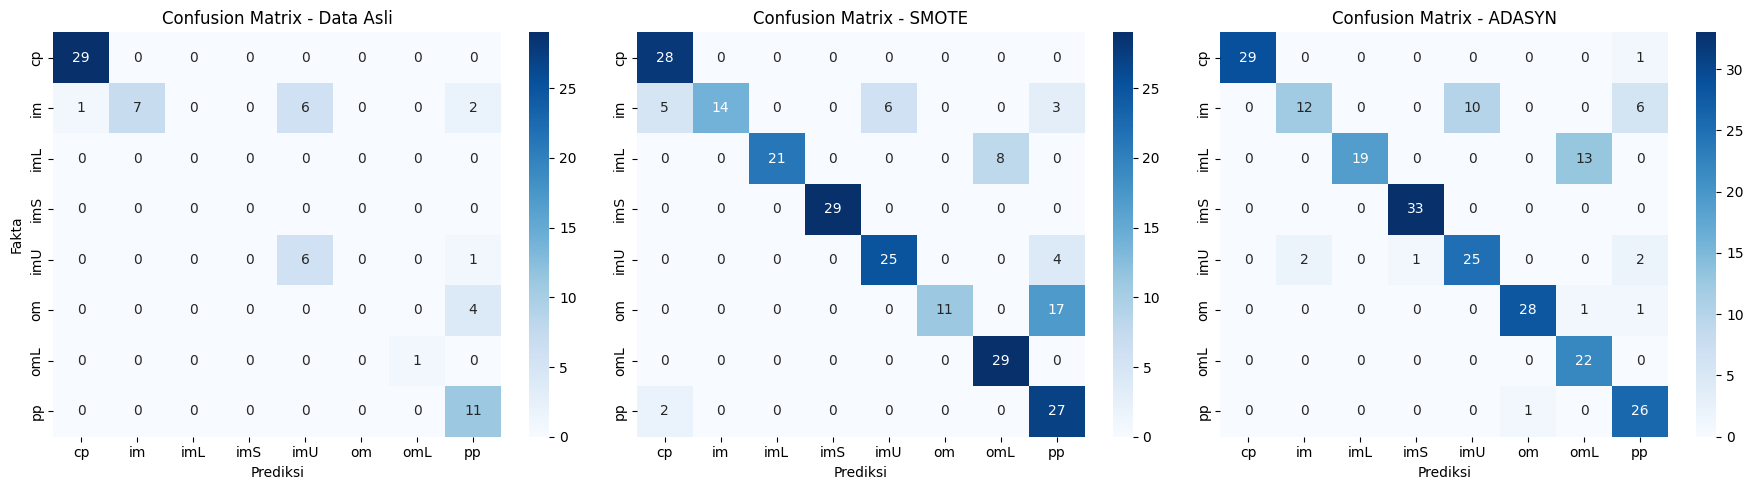

In [65]:
# === Perbandingan Akurasi Data Asli, SMOTE, dan ADASYN ===

# Akurasi data sebelum oversampling
akurasi = accuracy_score(y_test, prediksi)

# Akurasi data oversampling SMOTE
akurasi_smote = accuracy_score(y_test_smote, prediksi_smote)

# Akurasi data oversampling ADASYN
akurasi_adasyn = accuracy_score(y_test_adasyn, prediksi_adasyn)

# Bar Chart Perbandingan Akurasi
label = ['Data Asli', 'SMOTE', 'ADASYN']
nilai_akurasi = [akurasi, akurasi_smote, akurasi_adasyn]

fig, ax = plt.subplots(figsize=(8,6))
bc = ax.bar(label, nilai_akurasi, color=['#1f77b4','#ff7f0e','#2ca02c'])

# Tambahkan label nilai akurasi di atas bar
ax.bar_label(bc, label_type='center', color='w', fontweight='bold')

ax.set(
    xlabel='Kondisi Data',
    ylabel='Akurasi Klasifikasi Naive Bayes',
    title='Perbandingan Akurasi Naive Bayes pada Data Asli vs Oversampling'
)
ax.set_ylim(0, 1.05)
plt.show()

# === Confusion Matrix per Dataset ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix Data Asli
labels_asli = np.unique(np.concatenate([y_train, y_test]))
cm_asli = confusion_matrix(y_test, prediksi, labels=labels_asli)
sns.heatmap(cm_asli, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_asli, yticklabels=labels_asli, ax=axes[0])
axes[0].set_title("Confusion Matrix - Data Asli")
axes[0].set_xlabel("Prediksi")
axes[0].set_ylabel("Fakta")

# Confusion Matrix SMOTE
labels_smote = np.unique(np.concatenate([y_train_smote, y_test_smote]))
cm_smote = confusion_matrix(y_test_smote, prediksi_smote, labels=labels_smote)
sns.heatmap(cm_smote, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_smote, yticklabels=labels_smote, ax=axes[1])
axes[1].set_title("Confusion Matrix - SMOTE")
axes[1].set_xlabel("Prediksi")
axes[1].set_ylabel("")

# Confusion Matrix ADASYN
labels_adasyn = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))
cm_adasyn = confusion_matrix(y_test_adasyn, prediksi_adasyn, labels=labels_adasyn)
sns.heatmap(cm_adasyn, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_adasyn, yticklabels=labels_adasyn, ax=axes[2])
axes[2].set_title("Confusion Matrix - ADASYN")
axes[2].set_xlabel("Prediksi")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()


Hasil visualisasi perbandingan akurasi algoritma Naive Bayes menunjukkan bahwa pada data asli tingkat akurasi hanya sebesar 79,4%. Setelah dilakukan oversampling dengan metode SMOTE, akurasi mengalami peningkatan hingga 80,3%. Lebih lanjut, penerapan teknik ADASYN menghasilkan akurasi yang lebih tinggi, yaitu 83,6%. Temuan ini mengindikasikan bahwa strategi oversampling, terutama ADASYN, mampu memberikan kinerja yang lebih optimal dibandingkan data tanpa oversampling. Dengan demikian, penggunaan metode ini efektif dalam mengatasi permasalahan ketidakseimbangan kelas pada dataset.

# **2. Klasifikasi Menggunakan Random Forest**

## 2.1. Modeling Klasifikasi menggunakan Random Forest pada data ecoli sebelum di oversampling

Kolom dataset: ['id', 'sequence', 'mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class']
Akurasi: 0.8676

Classification Report:
               precision    recall  f1-score   support

          cp       0.94      1.00      0.97        29
          im       0.91      0.62      0.74        16
         imU       0.50      0.86      0.63         7
          om       1.00      1.00      1.00         4
         omL       1.00      1.00      1.00         1
          pp       1.00      0.82      0.90        11

    accuracy                           0.87        68
   macro avg       0.89      0.88      0.87        68
weighted avg       0.90      0.87      0.87        68



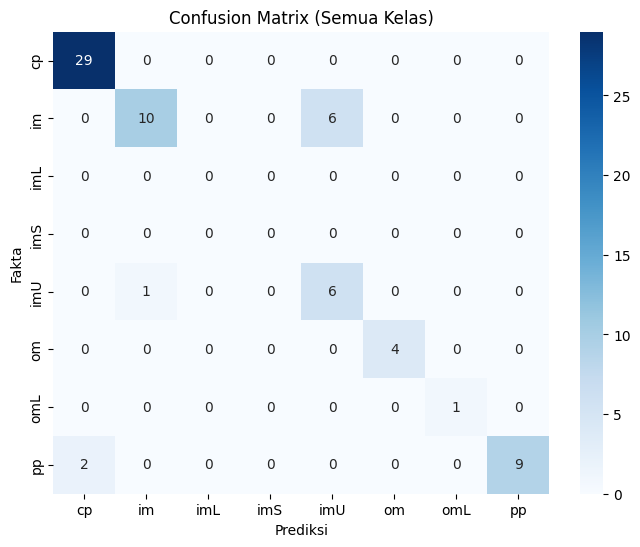

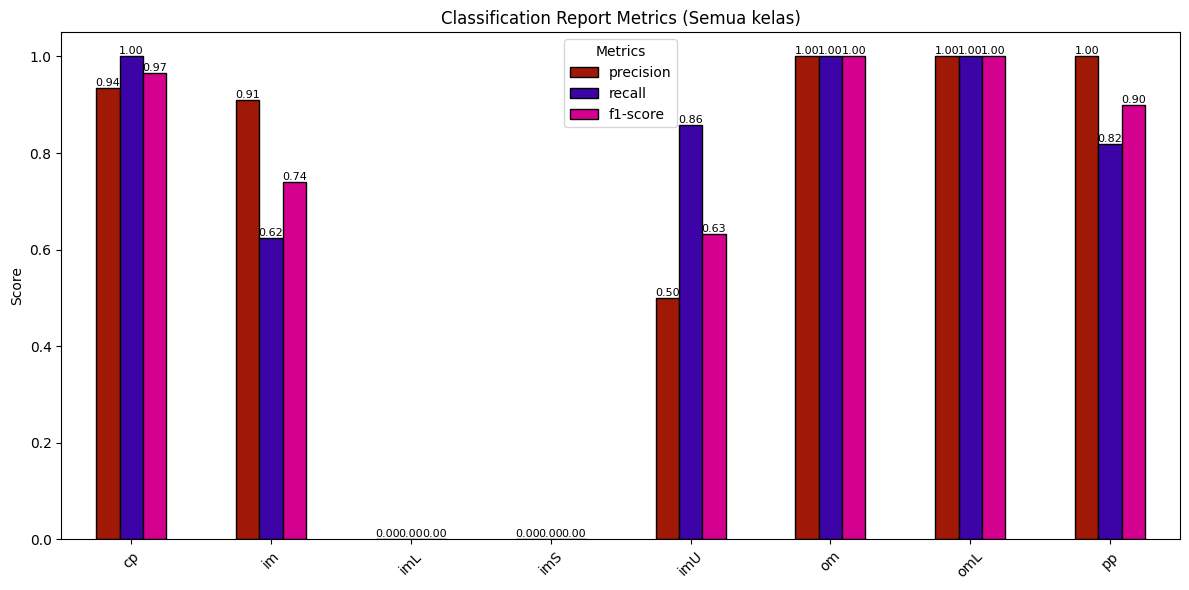

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === 1. Load dataset ===
data = pd.read_csv("data_ecoli_original.csv")

# Cek kolom
print("Kolom dataset:", data.columns.tolist())

# === 2. Pisahkan fitur (X) dan target (y) ===
# Hanya gunakan fitur numerik yang valid
X = data[["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]]
y = data["class"]

# === 3. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. Training Random Forest ===
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# === 5. Prediksi ===
prediksi = rf.predict(X_test)

# === 6. Evaluasi ===
akurasi = accuracy_score(y_test, prediksi)
print(f"Akurasi: {akurasi:.4f}")
print("\nClassification Report:\n", classification_report(y_test, prediksi, zero_division=0))

# === 7. Confusion Matrix ===
labels = np.unique(np.concatenate([y_train, y_test]))
cm = confusion_matrix(y_test, prediksi, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

# === 8. Grafik Precision, Recall, F1 ===
report = classification_report(
    y_test, prediksi, labels=labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()
metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# Tambah nilai di atas batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


## 2.2. Modeling Klasifikasi menggunakan Random Forest pada data Ecoli setelah di Oversampling menggunakan ADASYN

Kolom dataset: ['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class']
Akurasi: 0.9353

Classification Report:
               precision    recall  f1-score   support

          cp       0.91      1.00      0.95        29
          im       0.86      0.77      0.81        31
         imL       1.00      1.00      1.00        28
         imS       1.00      1.00      1.00        28
         imU       0.77      0.83      0.80        29
          om       1.00      1.00      1.00        29
         omL       1.00      1.00      1.00        29
          pp       0.96      0.90      0.93        29

    accuracy                           0.94       232
   macro avg       0.94      0.94      0.94       232
weighted avg       0.94      0.94      0.94       232



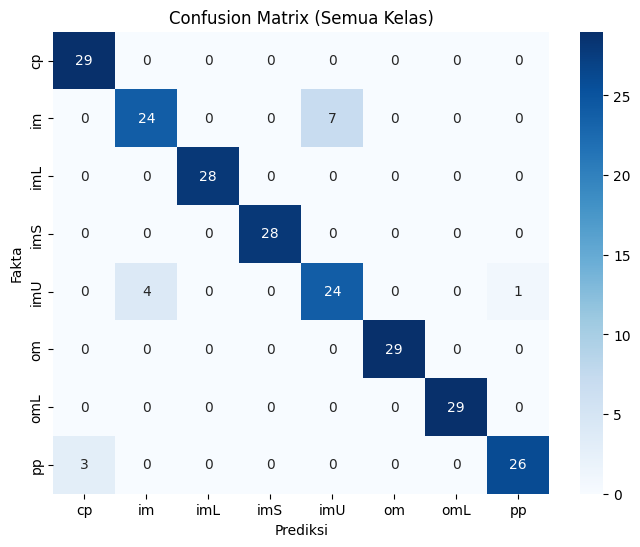

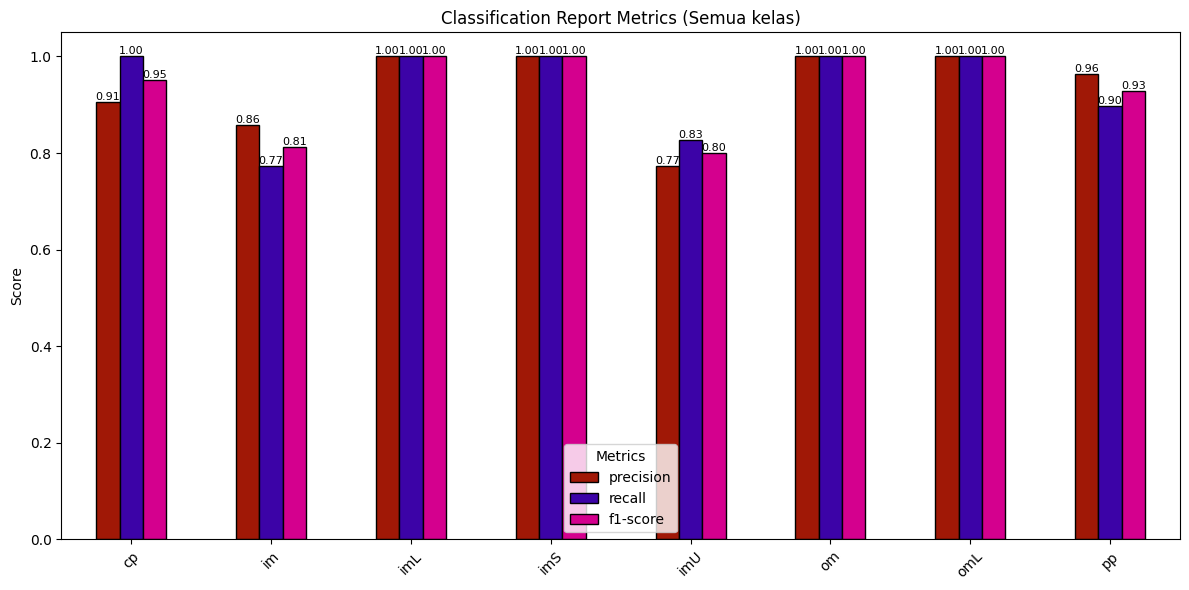

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === 1. Load dataset ===
data = pd.read_csv("data_ecoli_adasyn.csv")

# Cek kolom
print("Kolom dataset:", data.columns.tolist())

# === 2. Pisahkan fitur (X) dan target (y) ===
# Hanya gunakan fitur numerik yang valid
X = data[["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]]
y = data["class"]

# === 3. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. Training Random Forest ===
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# === 5. Prediksi ===
prediksi = rf.predict(X_test)

# === 6. Evaluasi ===
akurasi = accuracy_score(y_test, prediksi)
print(f"Akurasi: {akurasi:.4f}")
print("\nClassification Report:\n", classification_report(y_test, prediksi, zero_division=0))

# === 7. Confusion Matrix ===
labels = np.unique(np.concatenate([y_train, y_test]))
cm = confusion_matrix(y_test, prediksi, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

# === 8. Grafik Precision, Recall, F1 ===
report = classification_report(
    y_test, prediksi, labels=labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()
metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# Tambah nilai di atas batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


## 2.3. Modeling Klasifikasi menggunakan Random Forest pada data Ecoli setelah di Oversampling menggunakan SMOTE

Kolom dataset: ['mcg', 'gvh', 'lip', 'chg', 'aac', 'alm1', 'alm2', 'class']
Akurasi: 0.9607

Classification Report:
               precision    recall  f1-score   support

          cp       0.88      1.00      0.93        28
          im       0.96      0.86      0.91        28
         imL       1.00      1.00      1.00        29
         imS       1.00      1.00      1.00        29
         imU       0.90      0.93      0.92        29
          om       1.00      0.96      0.98        28
         omL       1.00      1.00      1.00        29
          pp       0.96      0.93      0.95        29

    accuracy                           0.96       229
   macro avg       0.96      0.96      0.96       229
weighted avg       0.96      0.96      0.96       229



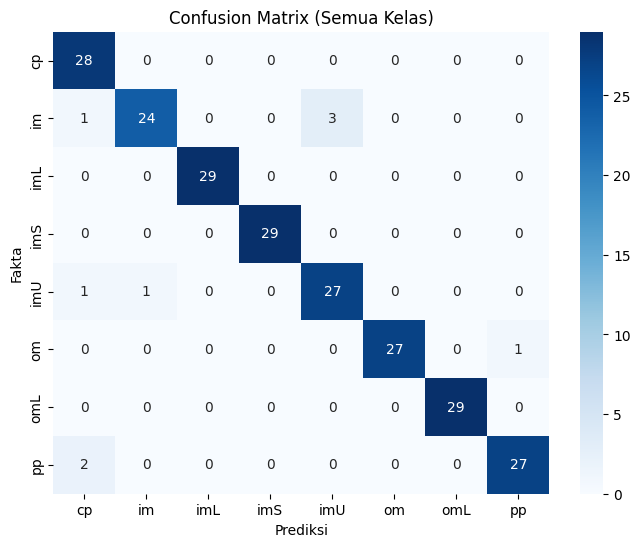

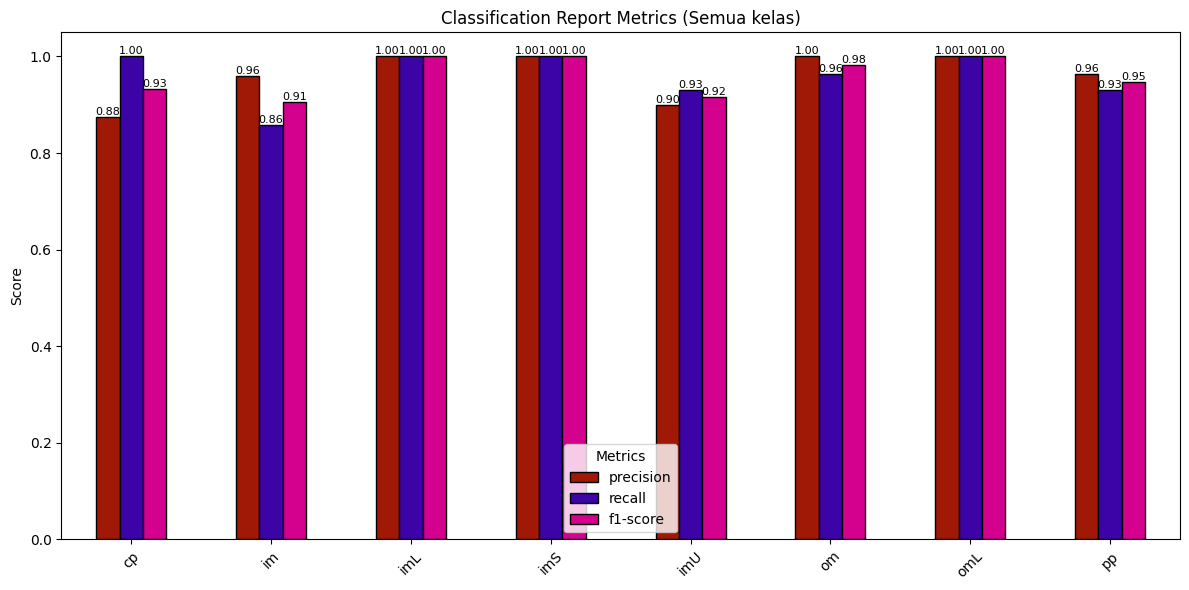

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === 1. Load dataset ===
data = pd.read_csv("data_ecoli_smote.csv")

# Cek kolom
print("Kolom dataset:", data.columns.tolist())

# === 2. Pisahkan fitur (X) dan target (y) ===
# Hanya gunakan fitur numerik yang valid
X = data[["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]]
y = data["class"]

# === 3. Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. Training Random Forest ===
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# === 5. Prediksi ===
prediksi = rf.predict(X_test)

# === 6. Evaluasi ===
akurasi = accuracy_score(y_test, prediksi)
print(f"Akurasi: {akurasi:.4f}")
print("\nClassification Report:\n", classification_report(y_test, prediksi, zero_division=0))

# === 7. Confusion Matrix ===
labels = np.unique(np.concatenate([y_train, y_test]))
cm = confusion_matrix(y_test, prediksi, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

# === 8. Grafik Precision, Recall, F1 ===
report = classification_report(
    y_test, prediksi, labels=labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()
metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# Tambah nilai di atas batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


## 2.4. Perbandingan akurasi antara data sebelum di oversampling dan sesudah

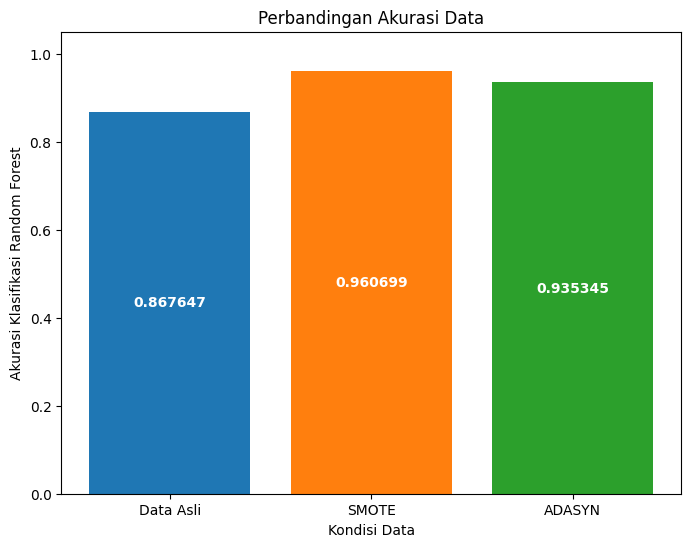

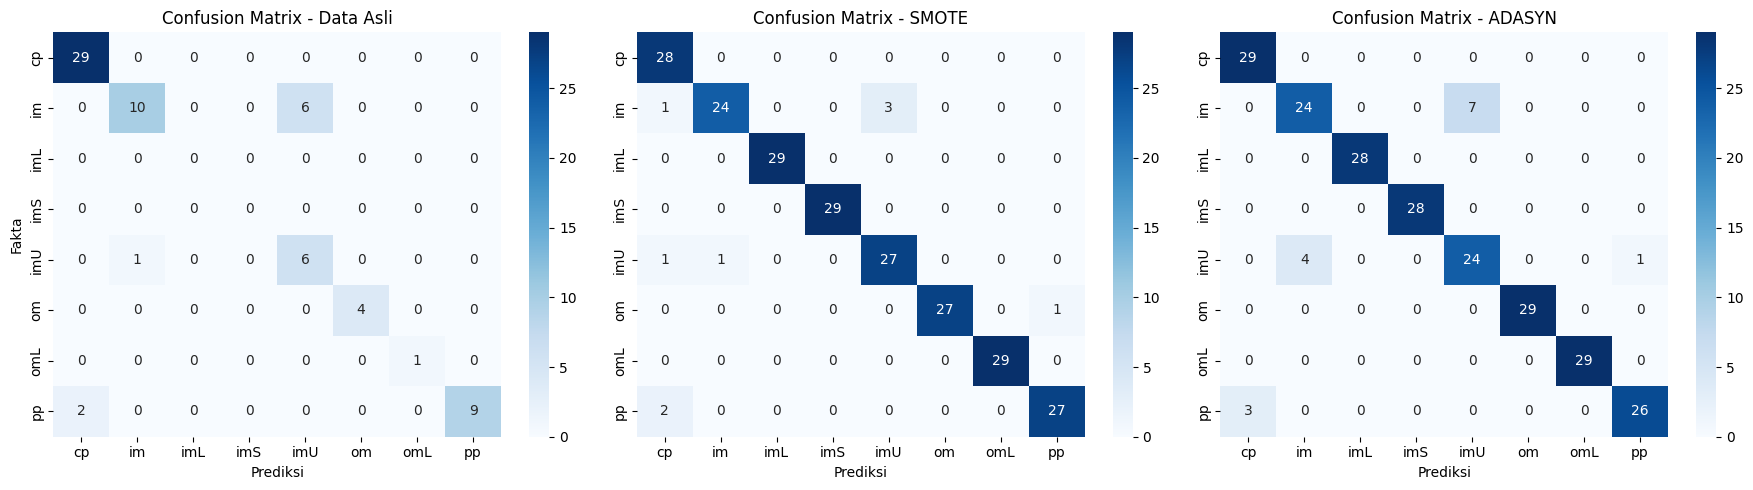

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# === 1. Load Data Original ===
data = pd.read_csv("data_ecoli_original.csv")

X = data[["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]]
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
prediksi = rf.predict(X_test)
akurasi = accuracy_score(y_test, prediksi)

# === 2. Load Data SMOTE ===
data_smote = pd.read_csv("data_ecoli_smote.csv")
X_smote = data_smote.drop(columns=["class"])
y_smote = data_smote["class"]

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote
)

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)
prediksi_smote = rf_smote.predict(X_test_smote)
akurasi_smote = accuracy_score(y_test_smote, prediksi_smote)

# === 3. Load Data ADASYN ===
data_adasyn = pd.read_csv("data_ecoli_adasyn.csv")
X_adasyn = data_adasyn.drop(columns=["class"])
y_adasyn = data_adasyn["class"]

X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(
    X_adasyn, y_adasyn, test_size=0.2, random_state=42, stratify=y_adasyn
)

rf_adasyn = RandomForestClassifier(random_state=42)
rf_adasyn.fit(X_train_adasyn, y_train_adasyn)
prediksi_adasyn = rf_adasyn.predict(X_test_adasyn)
akurasi_adasyn = accuracy_score(y_test_adasyn, prediksi_adasyn)

# === 4. Plot Perbandingan Akurasi ===
label = ['Data Asli', 'SMOTE', 'ADASYN']
temp = [akurasi, akurasi_smote, akurasi_adasyn]

fig, ax = plt.subplots(figsize=(8,6))
bc = ax.bar(label, temp, color=['#1f77b4','#ff7f0e','#2ca02c'])

ax.bar_label(bc, label_type='center', color='w', fontweight='bold')

ax.set(
    xlabel='Kondisi Data',
    ylabel='Akurasi Klasifikasi Random Forest',
    title='Perbandingan Akurasi Data'
)
ax.set_ylim(0, 1.05)
plt.show()

# === 5. Plot Confusion Matrix Side by Side ===
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Data Asli
labels = np.unique(np.concatenate([y_train, y_test]))
cm = confusion_matrix(y_test, prediksi, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Confusion Matrix - Data Asli")
axes[0].set_xlabel("Prediksi")
axes[0].set_ylabel("Fakta")

# Data SMOTE
labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))
cm = confusion_matrix(y_test_smote, prediksi_smote, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Confusion Matrix - SMOTE")
axes[1].set_xlabel("Prediksi")
axes[1].set_ylabel("")

# Data ADASYN
labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))
cm = confusion_matrix(y_test_adasyn, prediksi_adasyn, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_title("Confusion Matrix - ADASYN")
axes[2].set_xlabel("Prediksi")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()


Berdasarkan grafik perbandingan akurasi klasifikasi Random Forest, terlihat bahwa pada data asli akurasi hanya mencapai 86,7%, namun setelah dilakukan oversampling dengan SMOTE akurasi meningkat signifikan menjadi 96,0%, dan dengan ADASYN akurasi meningkat lebih tinggi lagi hingga 93,5%. Hal ini menunjukkan bahwa penggunaan teknik oversampling, khususnya SMOTE, mampu memberikan hasil yang lebih baik dibandingkan data asli, sehingga model dapat mengatasi masalah ketidakseimbangan kelas dengan lebih efektif.

# **3. Bagging Classifier Naive Bayes**

## 3.1. Bagging Classifier pada data yang belum di lakukan oversampling

/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:512: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:512: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:512: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:512: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:512: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:512: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.12/dist-packages/sklearn/naiv

Akurasi: 0.75
Classification Report:
               precision    recall  f1-score   support

          cp       0.91      0.94      0.92        32
          im       0.59      0.77      0.67        13
         imS       0.00      0.00      0.00         1
         imU       0.00      0.00      0.00         4
          om       1.00      0.33      0.50         6
         omL       1.00      1.00      1.00         1
          pp       0.57      0.73      0.64        11

    accuracy                           0.75        68
   macro avg       0.58      0.54      0.53        68
weighted avg       0.74      0.75      0.72        68



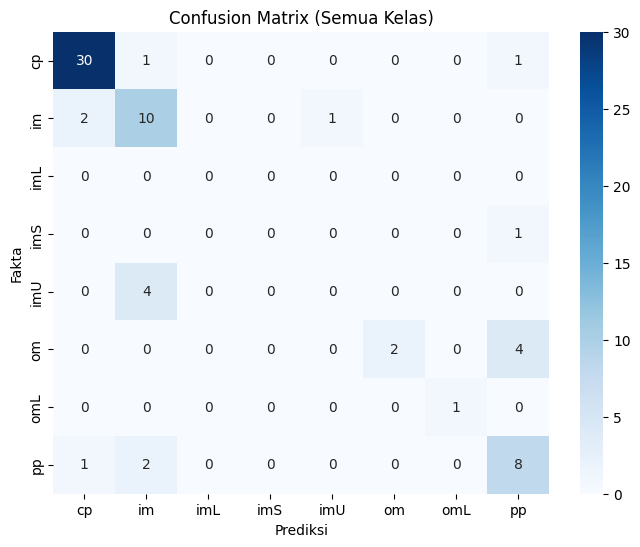

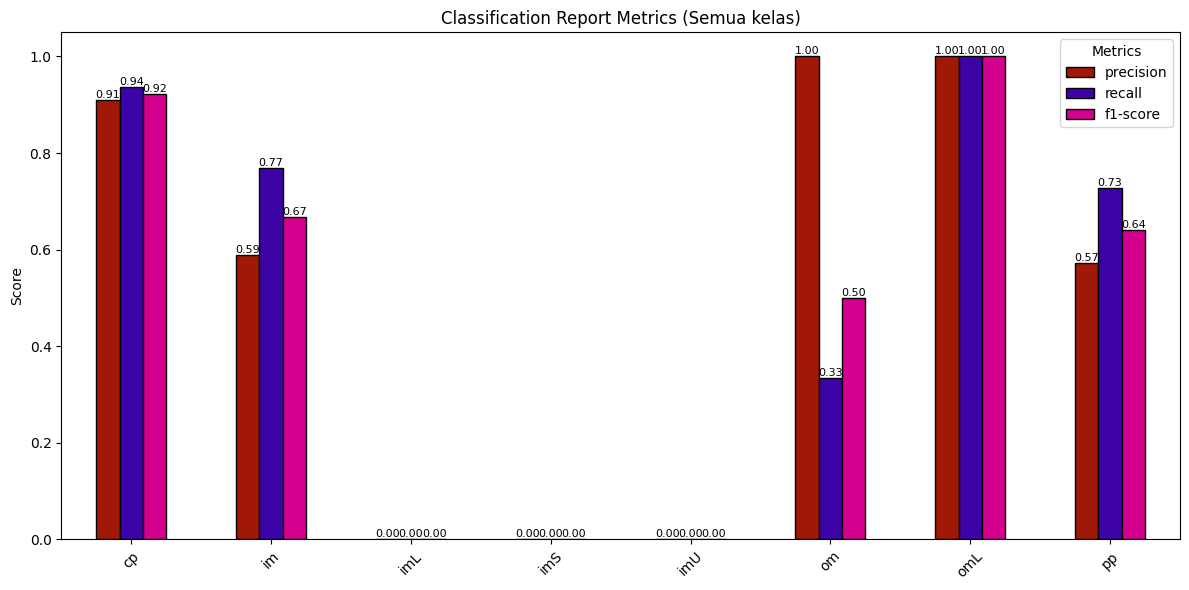

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === BACA DATASET CSV ===
df = pd.read_csv("data_ecoli_original.csv")

# drop kolom id dan sequence karena bukan fitur numerik
X = df.drop(columns=["id", "sequence", "class"])
y = df["class"]

# === SPLIT DATA ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === MODEL Naive Bayes dalam Bagging ===
model = GaussianNB()
bagging = BaggingClassifier(estimator=model, n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)

# === PREDIKSI ===
prediksi = bagging.predict(X_test)

# === AKURASI & REPORT ===
akurasi = accuracy_score(y_test, prediksi)
print("Akurasi:", akurasi)
print("Classification Report:\n", classification_report(y_test, prediksi, zero_division=0))

# === CONFUSION MATRIX ===
labels = np.unique(np.concatenate([y_train, y_test]))
cm = confusion_matrix(y_test, prediksi, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

# === CLASSIFICATION REPORT METRICS (BAR PLOT) ===
report = classification_report(
    y_test, prediksi, labels=labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()
metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


## 3.2. BaggingClassifier pada data yang sudah di lakukan oversampling dengan ADASYN

class
im     153
imU    145
om     144
omL    144
pp     144
cp     143
imL    142
imS    142
Name: count, dtype: int64
accuracy_score : 0.8577586206896551
Classification Report:
               precision    recall  f1-score   support

          cp       1.00      0.97      0.98        30
          im       0.88      0.50      0.64        28
         imL       1.00      0.62      0.77        32
         imS       1.00      1.00      1.00        33
         imU       0.71      0.90      0.79        30
          om       0.97      0.93      0.95        30
         omL       0.63      1.00      0.77        22
          pp       0.81      0.96      0.88        27

    accuracy                           0.86       232
   macro avg       0.87      0.86      0.85       232
weighted avg       0.89      0.86      0.85       232



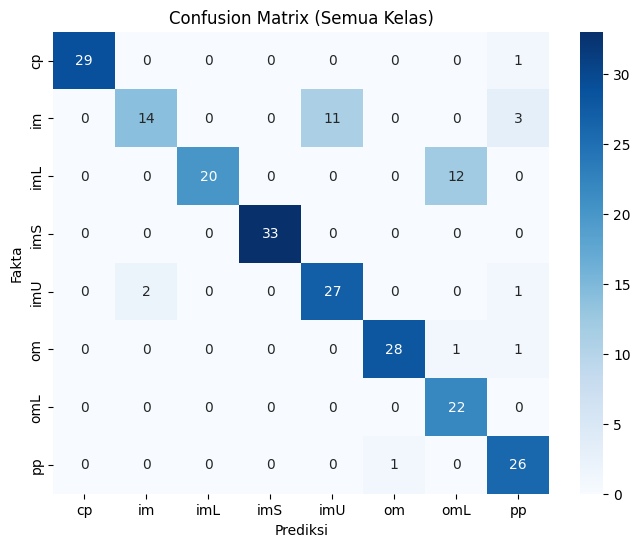

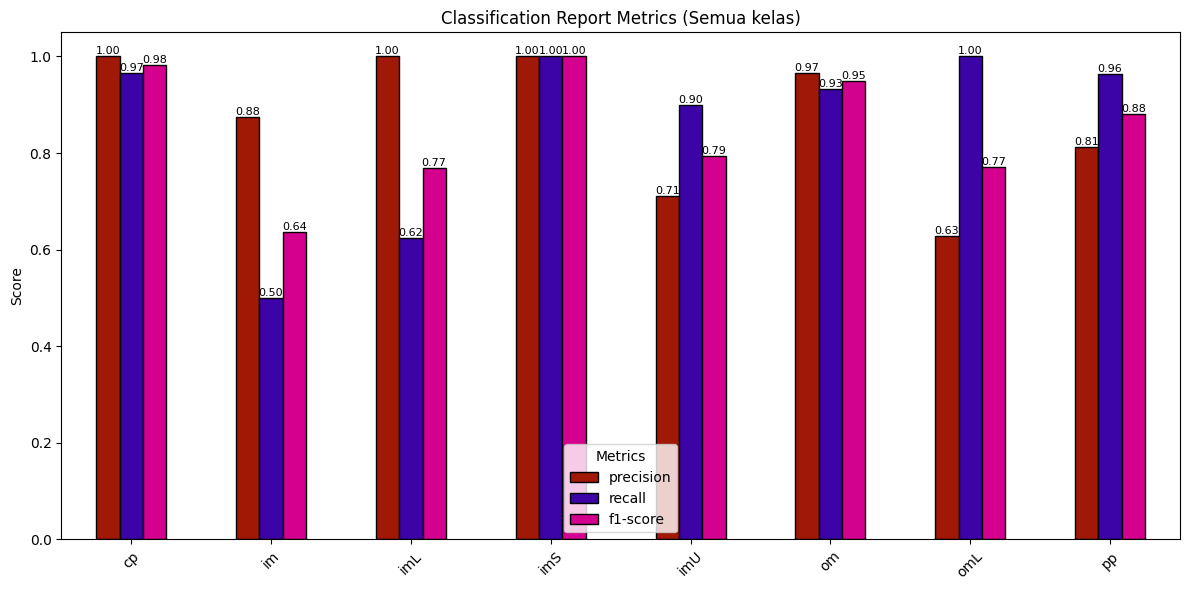

In [78]:
data_adasyn = pd.read_csv("data_ecoli_adasyn.csv")
print(data_adasyn["class"].value_counts())
x_adasyn = data_adasyn.drop(columns=["class"])
y_adasyn = data_adasyn["class"]

X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(
    x_adasyn, y_adasyn, test_size=0.2, random_state=42
)

model = GaussianNB()

bagging_adasyn = BaggingClassifier(estimator=model, n_estimators=100, random_state=42)

bagging_adasyn.fit(X_train_adasyn, y_train_adasyn)

prediksi_adasyn = bagging_adasyn.predict(X_test_adasyn)

akurasi_adasyn = accuracy_score(y_test_adasyn, prediksi_adasyn)
print(f"accuracy_score : {akurasi_adasyn}")
print("Classification Report:\n", classification_report(y_test_adasyn, prediksi_adasyn))

# confuison matrix

labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))

cm = confusion_matrix(y_test_adasyn, prediksi_adasyn, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

all_labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))

report = classification_report(
    y_test_adasyn, prediksi_adasyn, labels=all_labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()

metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

# warna diagram batang
ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"], # biru, oranye, hijau
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# diagram batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

## 3.3. BaggingClassifier pada data yang sudah di lakukan oversampling dengan SMOTE

class
cp     143
im     143
imS    143
imL    143
imU    143
om     143
omL    143
pp     143
Name: count, dtype: int64
Akurasi :  0.925764192139738
Classification Report:
               precision    recall  f1-score   support

          cp       1.00      0.97      0.98        32
          im       1.00      0.64      0.78        28
         imL       1.00      0.86      0.93        29
         imS       1.00      1.00      1.00        31
         imU       0.73      1.00      0.84        27
          om       0.97      0.97      0.97        29
         omL       0.79      1.00      0.88        19
          pp       0.97      0.97      0.97        34

    accuracy                           0.93       229
   macro avg       0.93      0.93      0.92       229
weighted avg       0.94      0.93      0.93       229



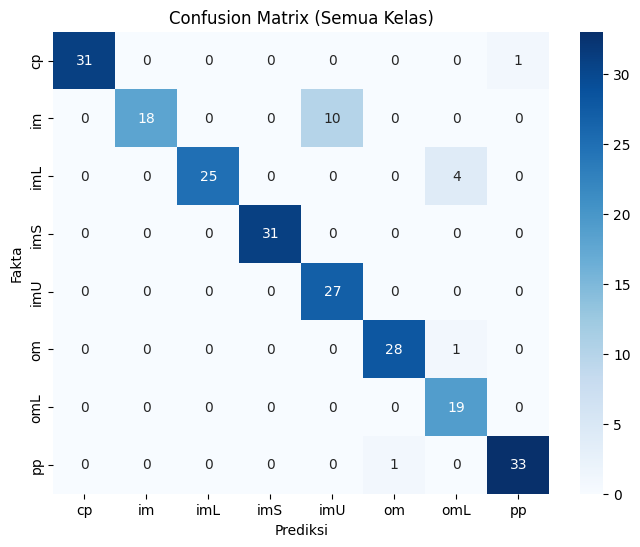

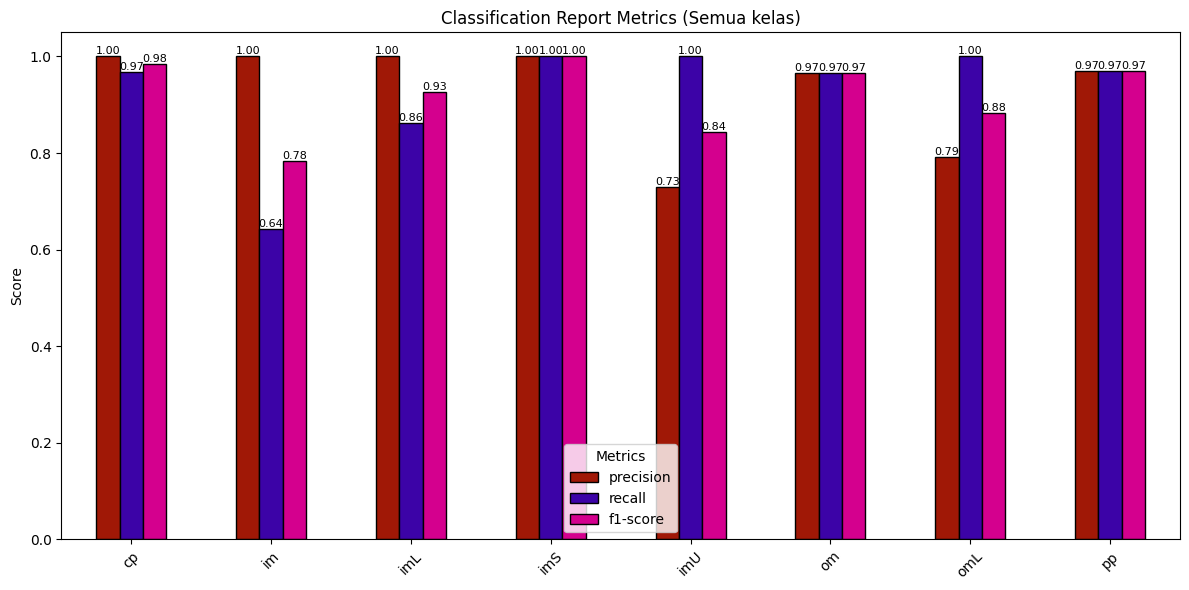

In [79]:
data_smote = pd.read_csv("data_ecoli_smote.csv")
print(data_smote["class"].value_counts())
x_smote = data_smote.drop(columns=["class"])
y_smote = data_smote["class"]
data_smote


X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    x_smote, y_smote, test_size=0.2, random_state=42
)

model = GaussianNB()
bagging_smote = BaggingClassifier(estimator=model, n_estimators=100, random_state=42)

bagging_smote.fit(X_train_smote, y_train_smote)

prediksi_smote = bagging_smote.predict(X_test_smote)

akurasi_smote = accuracy_score(y_test_smote, prediksi_smote)
print("Akurasi : ", akurasi_smote)
print("Classification Report:\n", classification_report(y_test_smote, prediksi_smote, zero_division=0))


# confuison matrix
labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))

cm = confusion_matrix(y_test_smote, prediksi_smote, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

all_labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))

report = classification_report(
    y_test_smote, prediksi_smote, labels=all_labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()

metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

# warna diagram batang
ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# diagram batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

## 3.4. Perbandingan Akurasi Bagging Classifire dengan model Naive Bayes

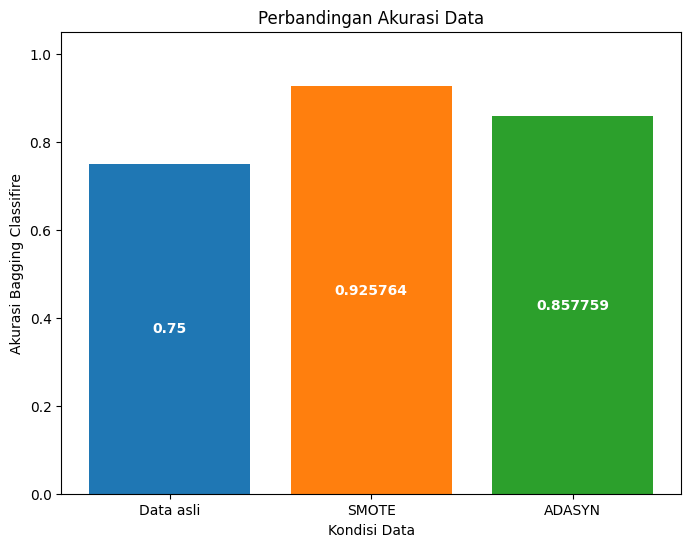

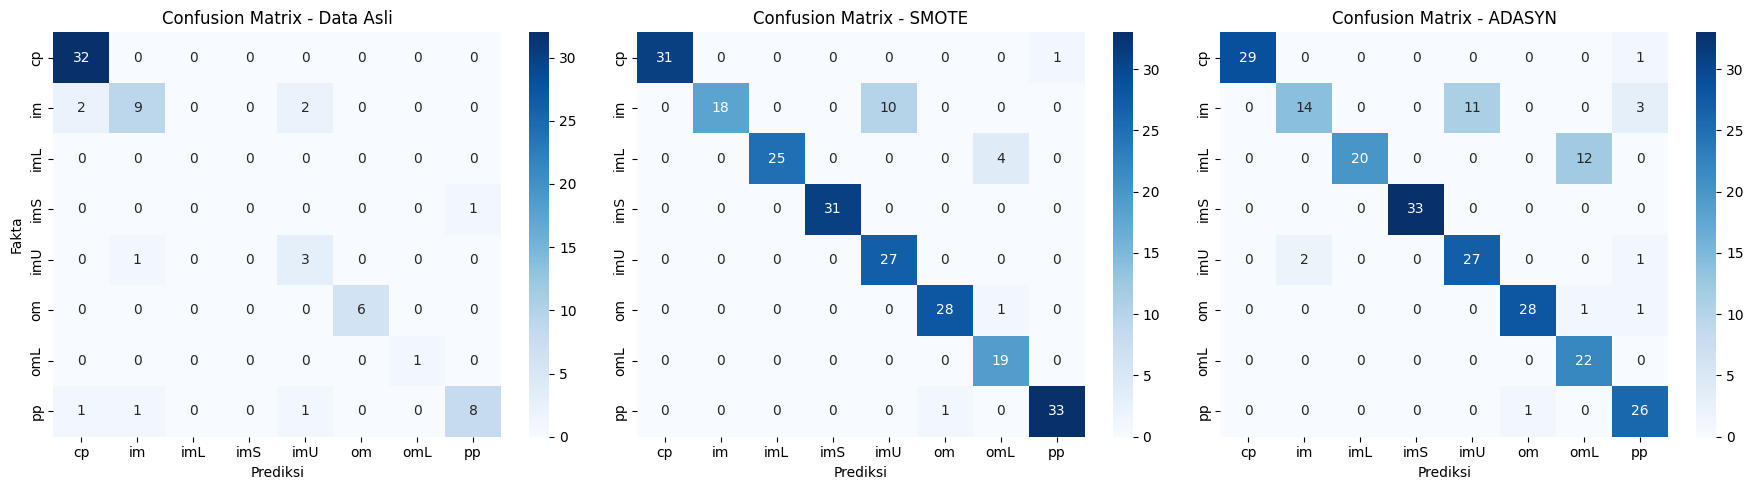

In [80]:
label = ['Data asli', 'SMOTE', 'ADASYN']
temp = [akurasi, akurasi_smote, akurasi_adasyn]

fig, ax = plt.subplots(figsize=(8,6))

bc = ax.bar(label, temp, color=['#1f77b4','#ff7f0e','#2ca02c'])

ax.bar_label(bc, label_type='center', color='w', fontweight='bold')

ax.set(
    xlabel='Kondisi Data',
    ylabel='Akurasi Bagging Classifire',
    title='Perbandingan Akurasi Data'
)

ax.set_ylim(0, 1.05)

plt.show()


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Data asli
labels = np.unique(np.concatenate([y_train, y_test]))
cm = confusion_matrix(y_test, prediksi, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Confusion Matrix - Data Asli")
axes[0].set_xlabel("Prediksi")
axes[0].set_ylabel("Fakta")

# Data SMOTE
labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))
cm = confusion_matrix(y_test_smote, prediksi_smote, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Confusion Matrix - SMOTE")
axes[1].set_xlabel("Prediksi")
axes[1].set_ylabel("")

# Data ADASYN
labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))
cm = confusion_matrix(y_test_adasyn, prediksi_adasyn, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_title("Confusion Matrix - ADASYN")
axes[2].set_xlabel("Prediksi")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

Berdasarkan hasil grafik perbandingan akurasi Bagging Classifier dengan Naive Bayes, terlihat bahwa akurasi pada data asli masih relatif rendah, yakni sekitar 75%. Namun, setelah dilakukan oversampling dengan SMOTE, akurasi meningkat menjadi 92,5%, dan dengan ADASYN akurasi kembali meningkat hingga 85,7%. Temuan ini menunjukkan bahwa penerapan teknik oversampling, terutama SMOTE, mampu meningkatkan kinerja model secara signifikan dibandingkan penggunaan data asli yang tidak seimbang pada Bagging Classifier dengan Naive Bayes.

# **4. Bagging Classifier Random Forest**

## 4.1. Bagging Classifier pada data yang belum di lakukan oversampling

HASIL BAGGING CLASSIFIER (Random Forest) - DATA ORIGINAL
Akurasi: 0.8676470588235294

Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       0.82      0.64      0.72        14
           4       0.00      0.00      0.00         1
           5       0.44      0.80      0.57         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2
           8       0.90      0.82      0.86        11

    accuracy                           0.87        68
   macro avg       0.73      0.75      0.73        68
weighted avg       0.88      0.87      0.87        68


Confusion Matrix:
 [[31  0  0  0  0  0  0]
 [ 0  9  0  5  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  1  0  4  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  2  0]
 [ 1  1  0  0  0  0  9]]


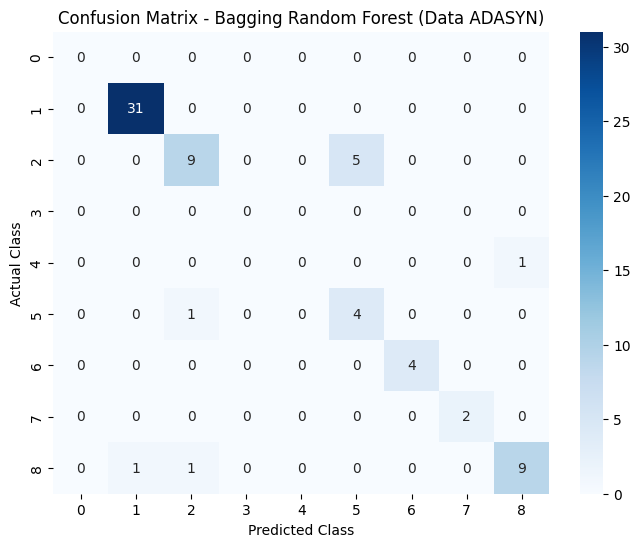

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Mengubah import untuk menyertakan RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# =====================================================================
# 1. PEMUATAN DATA & PREPROCESSING INTENSIF
# =====================================================================
# Asumsi: Data Ecoli tidak memiliki header dan kolom terakhir adalah target.
data = pd.read_csv("data_ecoli_original.csv", header=None)

# Pisahkan Target (y) dan Fitur (X)
y_origin = data.iloc[:, -1]
X_origin = data.drop(data.columns.get_loc(data.columns[-1]), axis=1)

# 1. Hapus Kolom ID/Nama (Kolom 0) yang non-numerik
if 0 in X_origin.columns:
    X_origin = X_origin.drop(columns=[0])

# 2. Konversi Target 'y' ke numerik (cat.codes)
if y_origin.dtype == 'object':
    y_origin = y_origin.astype('category').cat.codes

# 3. Konversi semua fitur X yang tersisa ke numerik dan imputasi NaN
for col in X_origin.columns:
    X_origin[col] = pd.to_numeric(X_origin[col], errors='coerce')
X_origin = X_origin.fillna(X_origin.mean())

# =====================================================================
# 2. SPLIT DATA
# =====================================================================
# 'stratify' dihapus karena ada kelas dengan hanya 1 anggota
X_train, X_test, y_train, y_test = train_test_split(
    X_origin, y_origin, test_size=0.2, random_state=42
)

# =====================================================================
# 3. MODEL BAGGING + RANDOM FOREST (PERUBAHAN UTAMA DI SINI)
# =====================================================================

# Base estimator diubah menjadi Random Forest
rf_base = RandomForestClassifier(
    n_estimators=50,       # Random Forest sudah memiliki n_estimators internal
    random_state=42,
    n_jobs=-1
)

# Bagging dengan base estimator Random Forest
bagging_rf = BaggingClassifier(
    estimator=rf_base,      # Menggunakan Random Forest sebagai base estimator
    n_estimators=10,        # Jumlah Bagging yang kecil disarankan karena RF sudah kuat
    random_state=42,
    n_jobs=-1
)

# Training model
bagging_rf.fit(X_train, y_train)

# Prediksi
y_pred = bagging_rf.predict(X_test)

# =====================================================================
# 4. EVALUASI DAN VISUALISASI HASIL
# =====================================================================
print("=" * 70)
print("HASIL BAGGING CLASSIFIER (Random Forest) - DATA ORIGINAL")
print("=" * 70)

# Akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm_bagging_rf_adasyn = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm_bagging_rf_adasyn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
labels = sorted(y_origin.unique())
cm_labeled = confusion_matrix(y_test, y_pred, labels=labels)

sns.heatmap(cm_labeled,
            annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix - Bagging Random Forest (Data ADASYN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

## 4.2. Bagging Classifier pada data yang sudah di lakukan oversampling menggunakan ADASYN


HASIL BAGGING CLASSIFIER (Random Forest) - DATA ADASYN
Akurasi: 0.896551724137931

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.93      0.90        30
           2       0.67      0.64      0.65        28
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        32
           5       0.76      0.69      0.72        32
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        22
           8       0.86      0.93      0.89        27

    accuracy                           0.90       232
   macro avg       0.90      0.90      0.90       232
weighted avg       0.89      0.90      0.89       232


Confusion Matrix:
 [[28  0  0  0  0  0  0  2]
 [ 2 18  0  0  7  0  0  1]
 [ 0  0 31  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  0]
 [ 0  9  0  0 22  0  0  1]
 [ 0  0  0  0  0 30  0  0]
 [ 0  0  0  0  0  0 22  0]
 [ 2  0  0  0  0  0  0 25]]


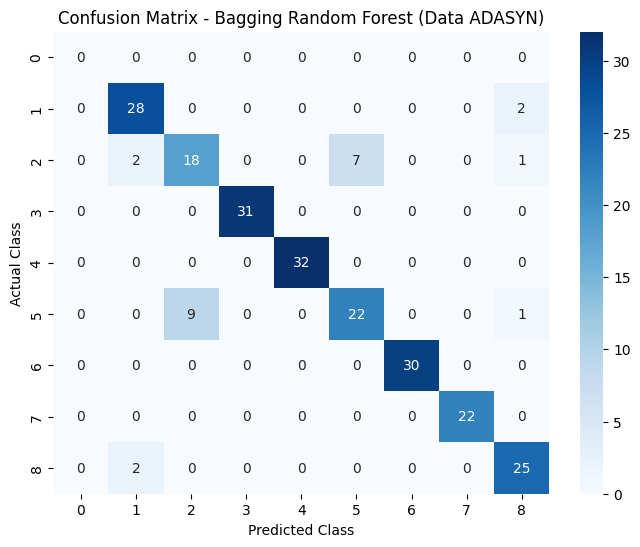

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Mengubah import untuk menyertakan RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# =====================================================================
# 1. PEMUATAN DATA & PREPROCESSING INTENSIF
# =====================================================================
# Asumsi: Data Ecoli tidak memiliki header dan kolom terakhir adalah target.
data = pd.read_csv("data_ecoli_adasyn.csv", header=None)

# Pisahkan Target (y) dan Fitur (X)
y_origin = data.iloc[:, -1]
X_origin = data.drop(data.columns.get_loc(data.columns[-1]), axis=1)

# 1. Hapus Kolom ID/Nama (Kolom 0) yang non-numerik
if 0 in X_origin.columns:
    X_origin = X_origin.drop(columns=[0])

# 2. Konversi Target 'y' ke numerik (cat.codes)
if y_origin.dtype == 'object':
    y_origin = y_origin.astype('category').cat.codes

# 3. Konversi semua fitur X yang tersisa ke numerik dan imputasi NaN
for col in X_origin.columns:
    X_origin[col] = pd.to_numeric(X_origin[col], errors='coerce')
X_origin = X_origin.fillna(X_origin.mean())

# =====================================================================
# 2. SPLIT DATA
# =====================================================================
# 'stratify' dihapus karena ada kelas dengan hanya 1 anggota
X_train, X_test, y_train, y_test = train_test_split(
    X_origin, y_origin, test_size=0.2, random_state=42
)

# =====================================================================
# 3. MODEL BAGGING + RANDOM FOREST (PERUBAHAN UTAMA DI SINI)
# =====================================================================

# Base estimator diubah menjadi Random Forest
rf_base = RandomForestClassifier(
    n_estimators=50,       # Random Forest sudah memiliki n_estimators internal
    random_state=42,
    n_jobs=-1
)

# Bagging dengan base estimator Random Forest
bagging_rf = BaggingClassifier(
    estimator=rf_base,      # Menggunakan Random Forest sebagai base estimator
    n_estimators=10,        # Jumlah Bagging yang kecil disarankan karena RF sudah kuat
    random_state=42,
    n_jobs=-1
)

# Training model
bagging_rf.fit(X_train, y_train)

# Prediksi
y_pred = bagging_rf.predict(X_test)

# =====================================================================
# 4. EVALUASI DAN VISUALISASI HASIL
# =====================================================================
print("=" * 70)
print("HASIL BAGGING CLASSIFIER (Random Forest) - DATA ADASYN")
print("=" * 70)

# Akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm_bagging_rf_adasyn = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm_bagging_rf_adasyn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
labels = sorted(y_origin.unique())
cm_labeled = confusion_matrix(y_test, y_pred, labels=labels)

sns.heatmap(cm_labeled,
            annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix - Bagging Random Forest (Data ADASYN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

## 4.3. Bagging Classifier pada data yang sudah di lakukan oversampling menggunakan SMOTE


HASIL BAGGING CLASSIFIER (Random Forest) - DATA SMOTE
Akurasi: 0.9301310043668122

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94        32
           2       0.84      0.75      0.79        28
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        30
           5       0.77      0.85      0.81        27
           6       1.00      0.97      0.98        29
           7       1.00      1.00      1.00        19
           8       0.92      0.94      0.93        35

    accuracy                           0.93       229
   macro avg       0.93      0.93      0.93       229
weighted avg       0.93      0.93      0.93       229


Confusion Matrix:
 [[30  0  0  0  0  0  0  2]
 [ 0 21  0  0  7  0  0  0]
 [ 0  0 29  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0]
 [ 0  4  0  0 23  0  0  0]
 [ 0  0  0  0  0 28  0  1]
 [ 0  0  0  0  0  0 19  0]
 [ 2  0  0  0  0  0  0 33]]


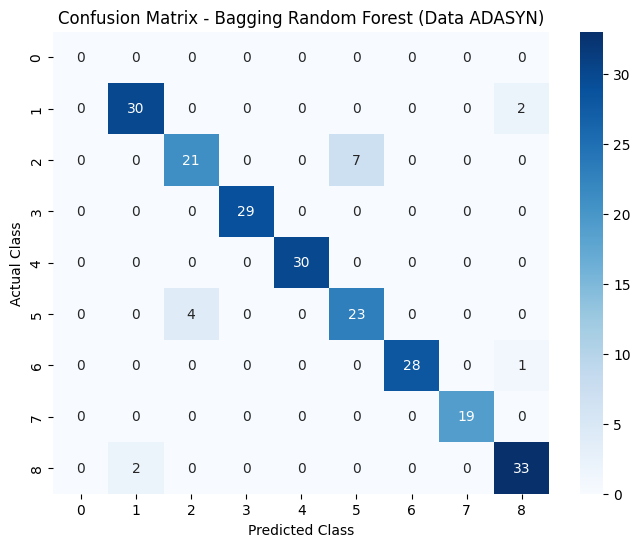

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Mengubah import untuk menyertakan RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# =====================================================================
# 1. PEMUATAN DATA & PREPROCESSING INTENSIF
# =====================================================================
# Asumsi: Data Ecoli tidak memiliki header dan kolom terakhir adalah target.
data = pd.read_csv("data_ecoli_smote.csv", header=None)

# Pisahkan Target (y) dan Fitur (X)
y_origin = data.iloc[:, -1]
X_origin = data.drop(data.columns.get_loc(data.columns[-1]), axis=1)

# 1. Hapus Kolom ID/Nama (Kolom 0) yang non-numerik
if 0 in X_origin.columns:
    X_origin = X_origin.drop(columns=[0])

# 2. Konversi Target 'y' ke numerik (cat.codes)
if y_origin.dtype == 'object':
    y_origin = y_origin.astype('category').cat.codes

# 3. Konversi semua fitur X yang tersisa ke numerik dan imputasi NaN
for col in X_origin.columns:
    X_origin[col] = pd.to_numeric(X_origin[col], errors='coerce')
X_origin = X_origin.fillna(X_origin.mean())

# =====================================================================
# 2. SPLIT DATA
# =====================================================================
# 'stratify' dihapus karena ada kelas dengan hanya 1 anggota
X_train, X_test, y_train, y_test = train_test_split(
    X_origin, y_origin, test_size=0.2, random_state=42
)

# =====================================================================
# 3. MODEL BAGGING + RANDOM FOREST (PERUBAHAN UTAMA DI SINI)
# =====================================================================

# Base estimator diubah menjadi Random Forest
rf_base = RandomForestClassifier(
    n_estimators=50,       # Random Forest sudah memiliki n_estimators internal
    random_state=42,
    n_jobs=-1
)

# Bagging dengan base estimator Random Forest
bagging_rf = BaggingClassifier(
    estimator=rf_base,      # Menggunakan Random Forest sebagai base estimator
    n_estimators=10,        # Jumlah Bagging yang kecil disarankan karena RF sudah kuat
    random_state=42,
    n_jobs=-1
)

# Training model
bagging_rf.fit(X_train, y_train)

# Prediksi
y_pred = bagging_rf.predict(X_test)

# =====================================================================
# 4. EVALUASI DAN VISUALISASI HASIL
# =====================================================================
print("=" * 70)
print("HASIL BAGGING CLASSIFIER (Random Forest) - DATA SMOTE")
print("=" * 70)

# Akurasi
print("Akurasi:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm_bagging_rf_adasyn = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm_bagging_rf_adasyn)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
labels = sorted(y_origin.unique())
cm_labeled = confusion_matrix(y_test, y_pred, labels=labels)

sns.heatmap(cm_labeled,
            annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix - Bagging Random Forest (Data ADASYN)")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

## 4.4. Perbandingan Akurasi Bagging Classifire dengan model Random Forest

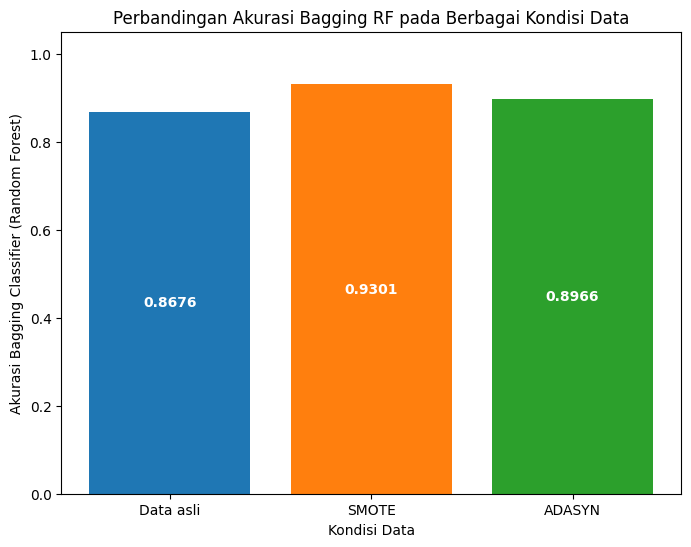

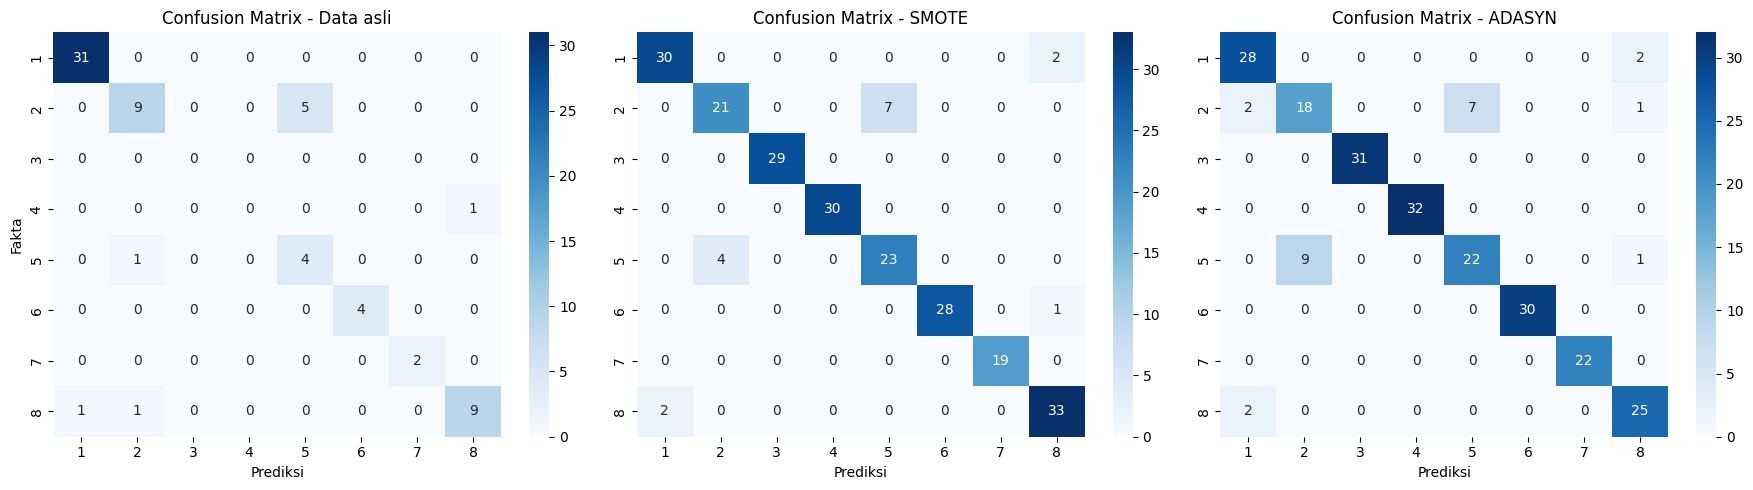

In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# File names (pastikan file-file ini ada di folder yang sama)
FILE_ORIGINAL = "data_ecoli_original.csv"
FILE_SMOTE = "data_ecoli_smote.csv"
FILE_ADASYN = "data_ecoli_adasyn.csv"

# Fungsi global untuk memproses data, melatih Bagging RF, dan mengevaluasi
def train_and_evaluate_bagging_rf(file_path):
    try:
        data = pd.read_csv(file_path, header=None)
    except FileNotFoundError:
        print(f"Error: File tidak ditemukan: {file_path}. Melewati proses.")
        return None, None, None

    # 1. PREPROCESSING
    y_origin = data.iloc[:, -1]
    X_origin = data.drop(data.columns.get_loc(data.columns[-1]), axis=1)

    # Hapus Kolom ID/Nama (Kolom 0)
    if 0 in X_origin.columns:
        X_origin = X_origin.drop(columns=[0])

    # Konversi Target 'y' ke numerik
    if y_origin.dtype == 'object':
        y_origin = y_origin.astype('category').cat.codes

    # Konversi fitur X ke numerik dan imputasi NaN
    for col in X_origin.columns:
        X_origin[col] = pd.to_numeric(X_origin[col], errors='coerce')
    X_origin = X_origin.fillna(X_origin.mean())

    # 2. SPLIT DATA (tanpa stratify)
    X_train, X_test, y_train, y_test = train_test_split(
        X_origin, y_origin, test_size=0.2, random_state=42
    )

    if X_train.shape[1] == 0:
        print(f"Error: Tidak ada fitur tersisa di {file_path} setelah preprocessing. Melewati proses.")
        return None, None, None

    # 3. MODEL BAGGING + RANDOM FOREST
    rf_base = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
    bagging_rf = BaggingClassifier(
        estimator=rf_base,
        n_estimators=10,
        random_state=42,
        n_jobs=-1
    )

    bagging_rf.fit(X_train, y_train)
    y_pred = bagging_rf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, y_test, y_pred

# --- EKSEKUSI UNTUK KETIGA DATA ---
acc_orig, y_test_orig, prediksi_orig = train_and_evaluate_bagging_rf(FILE_ORIGINAL)
acc_smote, y_test_smote, prediksi_smote = train_and_evaluate_bagging_rf(FILE_SMOTE)
acc_adasyn, y_test_adasyn, prediksi_adasyn = train_and_evaluate_bagging_rf(FILE_ADASYN)

# --- MEMFORMAT HASIL ---
results = {
    'Data asli': {'acc': acc_orig, 'y_test': y_test_orig, 'prediksi': prediksi_orig},
    'SMOTE': {'acc': acc_smote, 'y_test': y_test_smote, 'prediksi': prediksi_smote},
    'ADASYN': {'acc': acc_adasyn, 'y_test': y_test_adasyn, 'prediksi': prediksi_adasyn}
}

# Persiapan data untuk Plot Bar
label_bar = []
temp_bar = []
for label, res in results.items():
    if res['acc'] is not None:
        label_bar.append(label)
        temp_bar.append(res['acc'])

# --- Plot 1: Akurasi Bar Chart ---
if temp_bar:
    fig, ax = plt.subplots(figsize=(8,6))
    bc = ax.bar(label_bar, temp_bar, color=['#1f77b4','#ff7f0e','#2ca02c'])
    ax.bar_label(bc, label_type='center', color='w', fontweight='bold', fmt='%.4f')
    ax.set(
        xlabel='Kondisi Data',
        ylabel='Akurasi Bagging Classifier (Random Forest)',
        title='Perbandingan Akurasi Bagging RF pada Berbagai Kondisi Data'
    )
    ax.set_ylim(0, 1.05)
    plt.show()

# --- Plot 2: Confusion Matrices ---
cm_data = {k: v for k, v in results.items() if v['y_test'] is not None}
num_plots = len(cm_data)

if num_plots > 0:
    fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 5))
    if num_plots == 1:
        axes = [axes]

    all_y_tests = [v['y_test'] for v in cm_data.values()]
    all_prediksi = [v['prediksi'] for v in cm_data.values()]
    all_labels = np.unique(np.concatenate(all_y_tests + all_prediksi))
    labels_cm = sorted(all_labels)

    for i, (title, res) in enumerate(cm_data.items()):
        y_test_cm = res['y_test']
        prediksi_cm = res['prediksi']

        if len(y_test_cm) > 0 and len(prediksi_cm) > 0:
            cm = confusion_matrix(y_test_cm, prediksi_cm, labels=labels_cm)

            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                        xticklabels=labels_cm, yticklabels=labels_cm, ax=axes[i])
            axes[i].set_title(f"Confusion Matrix - {title}")
            axes[i].set_xlabel("Prediksi")
            if i == 0:
                axes[i].set_ylabel("Fakta")
            else:
                axes[i].set_ylabel("")

    plt.tight_layout()
    plt.show()

Berdasarkan grafik perbandingan akurasi Bagging Classifier dengan model Random Forest, dapat disimpulkan bahwa akurasi data asli masih lebih rendah yaitu sekitar 86,7%, sedangkan setelah dilakukan oversampling dengan SMOTE akurasi meningkat signifikan hingga 93,0%, dan dengan ADASYN akurasi juga meningkat menjadi 89,6%. Hal ini menunjukkan bahwa teknik oversampling, khususnya SMOTE, mampu memperbaiki performa model dibandingkan data asli yang tidak seimbang.